# Classification using All ML theorems 

https://github.com/rimanshu/Bank-Marketing-Data-Analysis/blob/master/Classification%20ML%20Model.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#setting dimension of graph
plt.rcParams["figure.figsize"]= (12, 7)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn import model_selection
from sklearn.metrics import classification, accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

!pip install catboost
from catboost import CatBoostClassifier

!pip install xgboost
from xgboost import XGBClassifier

!pip install lightgbm
from lightgbm import LGBMClassifier


     |████████████████████████████████| 67.3MB 63kB/s 


In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/rimanshu/Bank-Marketing-Data-Analysis/master/marketing-data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

#df.isnull().sum() # No Missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  is_success  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df['is_success'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: is_success, dtype: float64

### Outlier Detection 

Outliers can be defined as values out of range [(Q1-1.5IQR) , (Q3+1.5IQR)] but here I choose a range based on Maximum and Minimum value for each variable selected by observing Boxplot of corresponding variable

Q1-First Quartile(25%), Q2-Second Quartile(75%), IQR-Inter Quartile Range

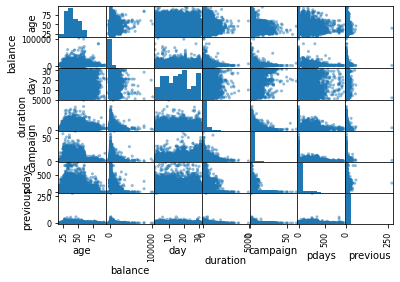

In [5]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

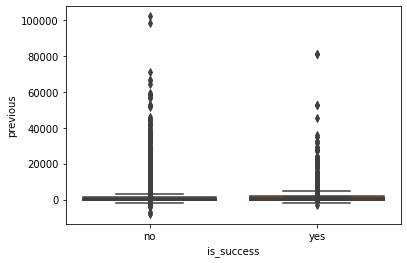

In [6]:
# age
sns.boxplot(x='is_success', y='age', data=df)

# balance
sns.boxplot(x='is_success', y='balance', data=df)

# day
sns.boxplot(x='is_success', y='day', data=df)

# duration
sns.boxplot(x='is_success', y='duration', data=df)

# campaign
sns.boxplot(x='is_success', y='campaign', data=df)

# pdays
sns.boxplot(x='is_success', y='pdays', data=df)

# previous
sns.boxplot(x='is_success', y='previous', data=df)

In [7]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

# Fixing balance column
dataset_new = df
min_val = dataset_new["balance"].min()
max_val = 20000
dataset_new = impute_outliers(df=dataset_new, column='balance' , minimum=min_val, maximum=max_val)

# Fixing duration column
min_val = dataset_new["duration"].min()
max_val = 2000
dataset_new = impute_outliers(df=dataset_new, column='duration' , minimum=min_val, maximum=max_val)

# Fixing campaign column
min_val = dataset_new["campaign"].min()
max_val = 20
dataset_new = impute_outliers(df=dataset_new, column='campaign' , minimum=min_val, maximum=max_val)

# Fixing pdays column
min_val = dataset_new["pdays"].min()
max_val = 250
dataset_new = impute_outliers(df=dataset_new, column='pdays' , minimum=min_val, maximum=max_val)

# Fixing 'previous' column
min_val = dataset_new["previous"].min()
max_val = 15
dataset_new = impute_outliers(df=dataset_new, column='previous' , minimum=min_val, maximum=max_val)

Analysis of Indepedent Categorical Variables
Note:
1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'impute_unknowns' function

job
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64
marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64
education
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64
default
no     98.197341
yes     1.802659
dtype: float64
housing
no     44.416182
yes    55.583818
dtype: float64
contact
cellular     64.774059
telephone     6.427639
unknown      28.798301
dtype: float64
month
apr     6.485147
aug    13.817434
dec     0.473336
feb     5.859194
jan     3.103227
jul    15.250713
jun    11.813497
mar     1.055053
may    30.448342
nov     8.781049
oct     1.632346
sep     1.280662
dtype: float64
poutcome
failure    

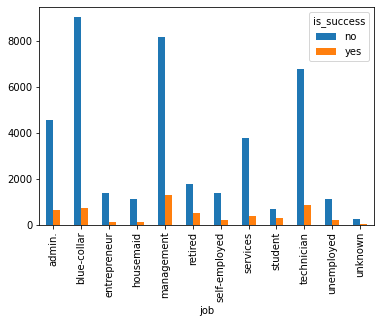

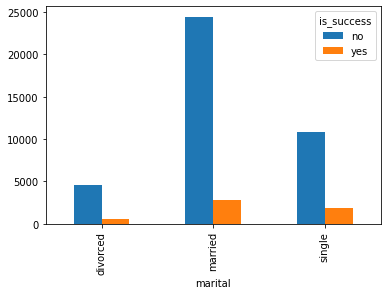

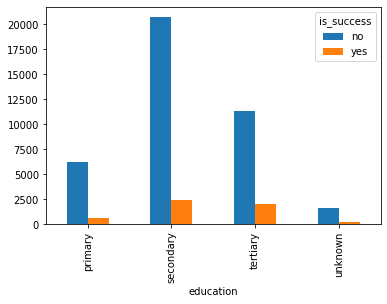

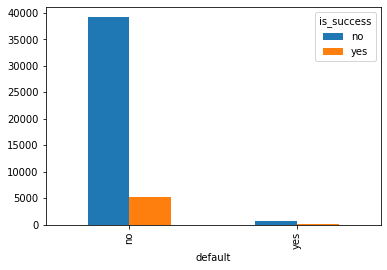

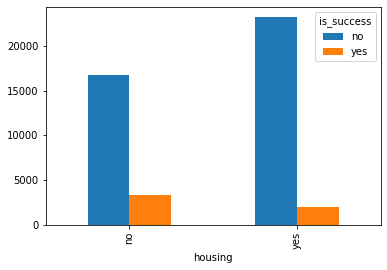

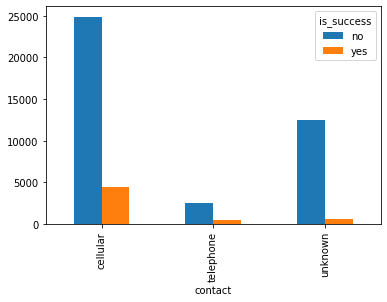

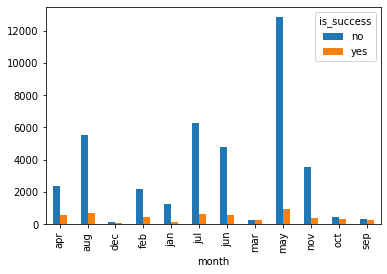

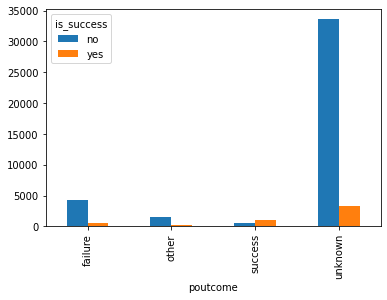

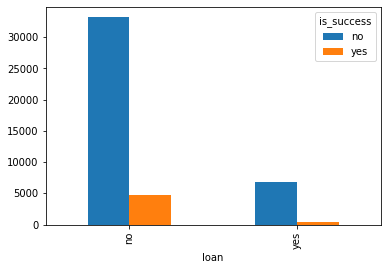

In [8]:
# job
temp1 = pd.crosstab(df['job'], df['is_success'])
temp1.plot(kind='bar')
print(df.groupby(['job']).size()/len(df)*100)

# marital
temp2 = pd.crosstab(df['marital'], df['is_success'])
temp2.plot(kind='bar')
print(df.groupby(['marital']).size()/len(df)*100)


# education
temp3 = pd.crosstab(df['education'], df['is_success'])
temp3.plot(kind='bar')
print(df.groupby(['education']).size()/len(df)*100)


# default
temp4 = pd.crosstab(df['default'], df['is_success'])
temp4.plot(kind='bar')
print(df.groupby(['default']).size()/len(df)*100)

# housing
temp5 = pd.crosstab(df['housing'], df['is_success'])
temp5.plot(kind='bar')
print(df.groupby(['housing']).size()/len(df)*100)

# "contact"
temp6 = pd.crosstab(df['contact'], df['is_success'])
temp6.plot(kind='bar')
print(df.groupby(['contact']).size()/len(df)*100)

# "month"
temp7 = pd.crosstab(df['month'], df['is_success'])
temp7.plot(kind='bar')
print(df.groupby(['month']).size()/len(df)*100)

# "poutcome"
temp8 = pd.crosstab(df['poutcome'], df['is_success'])
temp8.plot(kind='bar')
print(df.groupby(['poutcome']).size()/len(df)*100)

# "loan"
temp9 = pd.crosstab(df['loan'], df['is_success'])
temp9.plot(kind='bar')
print(df.groupby(['loan']).size()/len(df)*100)

In [9]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', df[column].mode(), col_values)
    return df

# Fixing 'job' column
dataset_new = impute_unknowns(df=dataset_new, column='job')

# Fixing 'education' column
dataset_new = impute_unknowns(df=dataset_new, column='education')

#dropping variable 'default'
del dataset_new['default']

# 'Contact' variable does not have any impact on target variable so we can drop this variable.
del dataset_new['contact']

#dropping variable 'poutcome'
del dataset_new['poutcome']



In [10]:
#Seperating Target variable from other variables
dataset_Y = dataset_new['is_success']
dataset_X = dataset_new[dataset_new.columns[0:12]]

#converting Independent Categorical into Numeriacal by creating Dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)
print(dataset_X_dummy.head())

   age  balance  day  duration  ...  month_may  month_nov  month_oct  month_sep
0   58   2143.0    5     261.0  ...          1          0          0          0
1   44     29.0    5     151.0  ...          1          0          0          0
2   33      2.0    5      76.0  ...          1          0          0          0
3   47   1506.0    5      92.0  ...          1          0          0          0
4   33      1.0    5     198.0  ...          1          0          0          0

[5 rows x 39 columns]


In [11]:
#converting dataframe into numpy Array
X = dataset_X_dummy.values
Y = dataset_Y.values

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Feature Selection with PCA

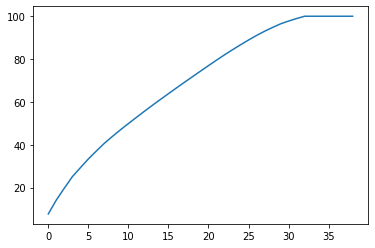

In [12]:
#Scaling the values
X_t = scale(X_train)

#initially lets create 39 components which is actual number of Variables we have
pca = PCA(n_components=39)

pca.fit(X_t)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#lets see Cumulative Variance plot
plt.plot(var1)

In [13]:
#Looking at above plot I'm taking 32 variables
pca = PCA(n_components=32)
pca.fit(X_t)
X_train_PC=pca.fit_transform(X_t)

In [14]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('AD', AdaBoostClassifier()))
models.append(('GD', GradientBoostingClassifier()))
# models.append(('CAT', CatBoostClassifier())) # It prints the iterations more on consol
models.append(('XG', XGBClassifier()))
models.append(('LGM', LGBMClassifier()))
# models.append(('SVM', SVC()))

In [15]:
# evaluate each model in turn
import time
results = []
names = []
for name, model in models:
    start = time.time()
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_PC, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f), (%s) (%f)" % (name, cv_results.mean(), cv_results.std(), "Execution time is ", (time.time() - start) )
    print(msg)

LR: 0.891755 (0.005013), (Execution time is ) (2.027751)
LDA: 0.891202 (0.004555), (Execution time is ) (2.998949)
K-NN: 0.883958 (0.004866), (Execution time is ) (24.566008)
CART: 0.854623 (0.006132), (Execution time is ) (27.478398)
RF: 0.892364 (0.003718), (Execution time is ) (235.308490)
NB: 0.859241 (0.004832), (Execution time is ) (0.661800)
AD: 0.889101 (0.003598), (Execution time is ) (101.418734)
GD: 0.893497 (0.005033), (Execution time is ) (412.822418)
XG: 0.893829 (0.004191), (Execution time is ) (83.274233)
LGM: 0.894880 (0.005572), (Execution time is ) (16.984106)


[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'K-NN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'AD'),
 Text(0, 0, 'GD'),
 Text(0, 0, 'XG'),
 Text(0, 0, 'LGM')]

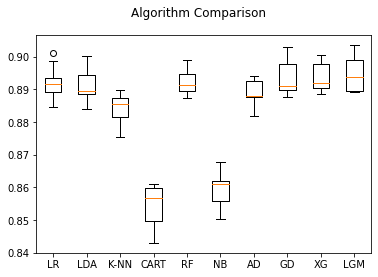

In [16]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [17]:
#Scaling the X_validation data
X_v = scale(X_validation)

pca.fit(X_v)
X_validation_PC=pca.fit_transform(X_v)

In [18]:
# Make predictions on validation dataset by choosing best Algorithm
lr = CatBoostClassifier()
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Learning rate set to 0.04768
0:	learn: 0.6457039	total: 78.5ms	remaining: 1m 18s
1:	learn: 0.6040081	total: 104ms	remaining: 52.1s
2:	learn: 0.5685877	total: 134ms	remaining: 44.6s
3:	learn: 0.5374471	total: 167ms	remaining: 41.6s
4:	learn: 0.5093101	total: 195ms	remaining: 38.7s
5:	learn: 0.4818170	total: 226ms	remaining: 37.4s
6:	learn: 0.4606176	total: 254ms	remaining: 36.1s
7:	learn: 0.4417629	total: 286ms	remaining: 35.4s
8:	learn: 0.4244767	total: 323ms	remaining: 35.6s
9:	learn: 0.4099870	total: 349ms	remaining: 34.6s
10:	learn: 0.3957586	total: 374ms	remaining: 33.6s
11:	learn: 0.3841637	total: 400ms	remaining: 32.9s
12:	learn: 0.3730737	total: 426ms	remaining: 32.4s
13:	learn: 0.3623147	total: 455ms	remaining: 32s
14:	learn: 0.3524248	total: 481ms	remaining: 31.6s
15:	learn: 0.3441994	total: 507ms	remaining: 31.2s
16:	learn: 0.3367115	total: 534ms	remaining: 30.9s
17:	learn: 0.3305736	total: 564ms	remaining: 30.8s
18:	learn: 0.3251047	total: 592ms	remaining: 30.5s
19:	learn: 0

In [19]:
# Make predictions on validation dataset by choosing best Algorithm
lr = LogisticRegression()
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy :  0.8828928452947031
[[7744  283]
 [ 776  240]]
              precision    recall  f1-score   support

          no       0.91      0.96      0.94      8027
         yes       0.46      0.24      0.31      1016

    accuracy                           0.88      9043
   macro avg       0.68      0.60      0.62      9043
weighted avg       0.86      0.88      0.87      9043

